Melakukan Data Cleaning pada data perjalanan Taxi

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
taxi = pd.read_csv("Taxi_Trip_Data.csv")

Pengecekan tipe data, jumlah data dan nan value dari setiap kolom apakah sudah sesuai.

In [4]:
taxi.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22699 entries, 0 to 22698
Data columns (total 18 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Unnamed: 0             22699 non-null  int64  
 1   VendorID               22699 non-null  int64  
 2   tpep_pickup_datetime   22699 non-null  object 
 3   tpep_dropoff_datetime  22699 non-null  object 
 4   passenger_count        22699 non-null  int64  
 5   trip_distance          22699 non-null  float64
 6   RatecodeID             22699 non-null  int64  
 7   store_and_fwd_flag     22699 non-null  object 
 8   PULocationID           22699 non-null  int64  
 9   DOLocationID           22699 non-null  int64  
 10  payment_type           22699 non-null  int64  
 11  fare_amount            22699 non-null  float64
 12  extra                  22699 non-null  float64
 13  mta_tax                22699 non-null  float64
 14  tip_amount             22699 non-null  float64
 15  to

In [5]:
taxi.head()

,Unnamed: 0,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount
0,24870114,2,03/25/2017 8:55:43 AM,03/25/2017 9:09:47 AM,6,3.34,1,N,100,231,1,13.0,0.0,0.5,2.76,0.0,0.3,16.56
1,35634249,1,04/11/2017 2:53:28 PM,04/11/2017 3:19:58 PM,1,1.80,1,N,186,43,1,16.0,0.0,0.5,4.00,0.0,0.3,20.80
2,106203690,1,12/15/2017 7:26:56 AM,12/15/2017 7:34:08 AM,1,1.00,1,N,262,236,1,6.5,0.0,0.5,1.45,0.0,0.3,8.75
3,38942136,2,05/07/2017 1:17:59 PM,05/07/2017 1:48:14 PM,1,3.70,1,N,188,97,1,20.5,0.0,0.5,6.39,0.0,0.3,27.69
4,30841670,2,04/15/2017 11:32:20 PM,04/15/2017 11:49:03 PM,1,4.37,1,N,4,112,2,16.5,0.5,0.5,0.00,0.0,0.3,17.80


Melihat ringkasan statistik pada setiap data angka

In [6]:
taxi.describe()

,Unnamed: 0,VendorID,passenger_count,trip_distance,RatecodeID,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount
count,2.269900e+04,22699.000000,22699.000000,22699.000000,22699.000000,22699.000000,22699.000000,22699.000000,22699.000000,22699.000000,22699.000000,22699.000000,22699.000000,22699.000000,22699.000000
mean,5.675849e+07,1.556236,1.642319,2.913313,1.043394,162.412353,161.527997,1.336887,13.026629,0.333275,0.497445,1.835781,0.312542,0.299551,16.310502
std,3.274493e+07,0.496838,1.285231,3.653171,0.708391,66.633373,70.139691,0.496211,13.243791,0.463097,0.039465,2.800626,1.399212,0.015673,16.097295
min,1.212700e+04,1.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,-120.000000,-1.000000,-0.500000,0.000000,0.000000,-0.300000,-120.300000
25%,2.852056e+07,1.000000,1.000000,0.990000,1.000000,114.000000,112.000000,1.000000,6.500000,0.000000,0.500000,0.000000,0.000000,0.300000,8.750000
50%,5.673150e+07,2.000000,1.000000,1.610000,1.000000,162.000000,162.000000,1.000000,9.500000,0.000000,0.500000,1.350000,0.000000,0.300000,11.800000
75%,8.537452e+07,2.000000,2.000000,3.060000,1.000000,233.000000,233.000000,2.000000,14.500000,0.500000,0.500000,2.450000,0.000000,0.300000,17.800000
max,1.134863e+08,2.000000,6.000000,33.960000,99.000000,265.000000,265.000000,4.000000,999.990000,4.500000,0.500000,200.000000,19.100000,0.300000,1200.290000


Terdapat nilai minus yang seharusnya tidak mungkin, nilai tersebut akan kita perbaiki dan bisa jadi outlier.

Cek data dengan nilai NaN/Missing Value

In [7]:
taxi.isnull().sum()

Unnamed: 0               0
VendorID                 0
tpep_pickup_datetime     0
tpep_dropoff_datetime    0
passenger_count          0
trip_distance            0
RatecodeID               0
store_and_fwd_flag       0
PULocationID             0
DOLocationID             0
payment_type             0
fare_amount              0
extra                    0
mta_tax                  0
tip_amount               0
tolls_amount             0
improvement_surcharge    0
total_amount             0
dtype: int64

Cek Duplikasi Data

Setelah dilakukan pengecekan tidak ditemukan data yang ganda

In [8]:
duplicate = taxi[taxi.duplicated()]
print(duplicate)

Empty DataFrame
Columns: [Unnamed: 0, VendorID, tpep_pickup_datetime, tpep_dropoff_datetime, passenger_count, trip_distance, RatecodeID, store_and_fwd_flag, PULocationID, DOLocationID, payment_type, fare_amount, extra, mta_tax, tip_amount, tolls_amount, improvement_surcharge, total_amount]
Index: []


Mengubah tipe data data waktu dari object ke datetime

In [9]:
taxi['tpep_pickup_datetime']=pd.to_datetime(taxi['tpep_pickup_datetime'])
taxi['tpep_dropoff_datetime']=pd.to_datetime(taxi['tpep_dropoff_datetime'])

Melakukan ekstraksi pada data waktu

In [10]:
taxi['month']=taxi['tpep_dropoff_datetime'].dt.month_name()
taxi['duration']=(taxi['tpep_dropoff_datetime']-taxi['tpep_pickup_datetime'])/np.timedelta64(1,'h')
taxi['speed']=(taxi['trip_distance']/taxi['duration'])

In [11]:
taxi.describe()

,Unnamed: 0,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,duration,speed
count,2.269900e+04,22699.000000,22699,22699,22699.000000,22699.000000,22699.000000,22699.000000,22699.000000,22699.000000,22699.000000,22699.000000,22699.000000,22699.000000,22699.000000,22699.000000,22699.000000,22699.000000,22673.000000
mean,5.675849e+07,1.556236,2017-06-29 07:32:48.973126656,2017-06-29 07:49:49.799726848,1.642319,2.913313,1.043394,162.412353,161.527997,1.336887,13.026629,0.333275,0.497445,1.835781,0.312542,0.299551,16.310502,0.283563,13.773098
min,1.212700e+04,1.000000,2017-01-01 00:08:25,2017-01-01 00:17:20,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,-120.000000,-1.000000,-0.500000,0.000000,0.000000,-0.300000,-120.300000,-0.283056,-20.137390
25%,2.852056e+07,1.000000,2017-03-30 03:09:38.500000,2017-03-30 03:11:20.500000,1.000000,0.990000,1.000000,114.000000,112.000000,1.000000,6.500000,0.000000,0.500000,0.000000,0.000000,0.300000,8.750000,0.110833,7.248322
50%,5.673150e+07,2.000000,2017-06-23 12:35:57,2017-06-23 12:55:11,1.000000,1.610000,1.000000,162.000000,162.000000,1.000000,9.500000,0.000000,0.500000,1.350000,0.000000,0.300000,11.800000,0.186389,9.837494
75%,8.537452e+07,2.000000,2017-10-02 10:34:34,2017-10-02 10:53:47,2.000000,3.060000,1.000000,233.000000,233.000000,2.000000,14.500000,0.500000,0.500000,2.450000,0.000000,0.300000,17.800000,0.306389,13.603053
max,1.134863e+08,2.000000,2017-12-31 23:45:30,2017-12-31 23:49:24,6.000000,33.960000,99.000000,265.000000,265.000000,4.000000,999.990000,4.500000,0.500000,200.000000,19.100000,0.300000,1200.290000,23.992500,15120.000000
std,3.274493e+07,0.496838,NaN,NaN,1.285231,3.653171,0.708391,66.633373,70.139691,0.496211,13.243791,0.463097,0.039465,2.800626,1.399212,0.015673,16.097295,1.033275,146.862414


Pengecekan Outlier pada setiap data angka non kategorikal


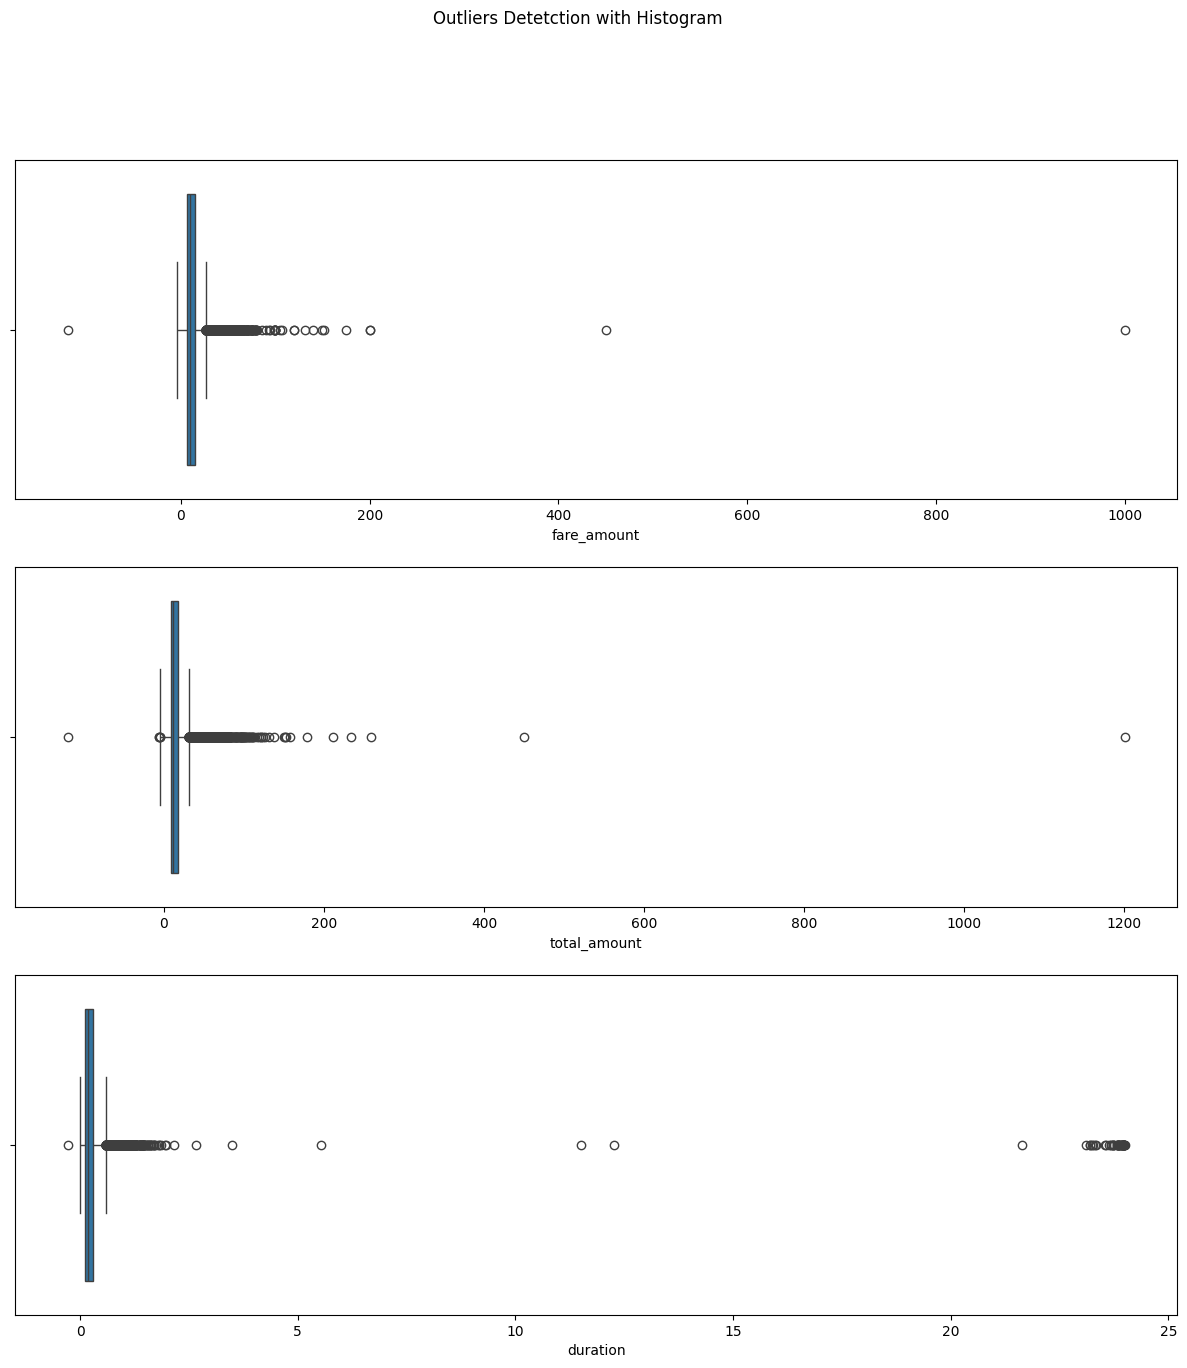

In [12]:
fig, axes = plt.subplots(3,1, figsize=(15,15))

fig.suptitle('Outliers Detetction with Histogram')
sns.boxplot(ax=axes[0], x=taxi['fare_amount'])
sns.boxplot(ax=axes[1], x=taxi['total_amount'])
sns.boxplot(ax=axes[2], x=taxi['duration'])
plt.show()


Untuk nilai minus saya jadikan positif karena nilainya tidak jauh berbeda dengan lainnya saya beranggapan ini bisa jadi kesalahan input atau eror ketikan collect data

In [13]:
taxi['fare_amount'] = taxi['fare_amount'].abs()

In [14]:
q1 = taxi['fare_amount'].quantile(0.25)
q3 = taxi['fare_amount'].quantile(0.75)
iqr = q3-q1

iqr_fac = 1.5

up_lim = q3 + (iqr_fac*iqr)
low_lim = q1 - (iqr_fac*iqr)

print(q1)
print(q3)
print(up_lim)
print(low_lim)

6.5
14.5
26.5
-5.5


In [15]:
taxi[taxi.fare_amount>26.5]

,Unnamed: 0,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,...,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,month,duration,speed
6,37660487,2,2017-05-03 19:04:09,2017-05-03 20:03:47,1,12.83,1,N,79,241,...,47.50,1.0,0.5,9.86,0.00,0.3,59.16,May,0.993889,12.908888
11,18600059,2,2017-03-05 19:15:30,2017-03-05 19:52:18,2,18.90,2,N,236,132,...,52.00,0.0,0.5,14.58,5.54,0.3,72.92,March,0.613333,30.815217
21,85505540,2,2017-10-11 12:34:49,2017-10-11 13:22:38,1,12.30,5,N,138,265,...,68.25,0.0,0.0,12.00,16.26,0.3,96.81,October,0.796944,15.433949
29,94052446,2,2017-11-06 20:30:50,2017-11-07 00:00:00,1,30.83,1,N,132,23,...,80.00,0.5,0.5,18.56,11.52,0.3,111.38,November,3.486111,8.843665
32,63600506,2,2017-07-26 23:26:50,2017-07-26 23:55:49,1,14.32,1,N,132,149,...,40.50,0.5,0.5,0.00,0.00,0.3,41.80,July,0.483056,29.644623
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22645,58842954,1,2017-07-10 22:56:44,2017-07-10 23:25:16,1,7.90,1,N,249,41,...,27.50,0.5,0.5,2.00,0.00,0.3,30.80,July,0.475556,16.612150
22668,14034918,2,2017-02-22 06:45:04,2017-02-22 07:19:34,5,25.30,1,N,181,132,...,67.50,0.0,0.5,17.08,0.00,0.3,87.33,February,0.575000,44.000000
22676,105938763,2,2017-12-14 12:21:01,2017-12-14 12:56:21,1,9.47,1,N,138,263,...,32.00,0.0,0.5,6.00,5.76,0.3,44.56,December,0.588889,16.081132
22686,9039930,2,2017-02-08 18:13:26,2017-02-08 19:34:11,5,10.64,1,N,170,70,...,52.00,1.0,0.5,14.84,5.54,0.3,74.18,February,1.345833,7.905882


In [16]:
taxi['fare_amount'].describe()

count    22699.000000
mean        13.041035
std         13.229605
min          0.000000
25%          6.500000
50%          9.500000
75%         14.500000
max        999.990000
Name: fare_amount, dtype: float64

Saya mengambil sampel perbandingan antara 'fare_amount' dan 'trip_distance'. Disini terdapat keanehan data(sebelum saya running), terdapat nilai trip_distace 0, tetapi nilai fare_amount ada bahkan berjumlah besar. Maka dari itu disini, saya hapus nilai fare_amount diatas 26,5 yang bernilai trip_distance 0. 

In [18]:
filtered_data = taxi[taxi['fare_amount'] > 26.5][['fare_amount', 'trip_distance', 'total_amount']]
sorted_data = filtered_data.sort_values(by='fare_amount', ascending=False)
print(sorted_data)

       fare_amount  trip_distance  total_amount
8476        999.99           2.60       1200.29
20312       450.00           0.00        450.30
13861       200.01          33.92        258.21
15474       200.00           0.00        211.80
12511       175.00           0.00        233.74
...            ...            ...           ...
18503        27.00           9.58         33.56
15739        27.00           8.09         38.59
15594        27.00           8.71         31.30
18504        27.00           9.50         30.44
386          27.00           7.40         33.35

[2064 rows x 3 columns]


In [ ]:
drop_data = taxi.drop(taxi.loc[(taxi['fare_amount'] > 26.5) & (taxi['trip_distance'] == 0)].index, inplace=True)

Namun, disini saya masih ingin lebih tahu pada index 8476 terdapat jumlah fare_amount yang tidak wajar dan tidak sebanding dengan nilai trip_distance.

In [19]:
print(taxi.iloc[8476])

Unnamed: 0                          11157412
VendorID                                   1
tpep_pickup_datetime     2017-02-06 05:50:10
tpep_dropoff_datetime    2017-02-06 05:51:08
passenger_count                            1
trip_distance                            2.6
RatecodeID                                 5
store_and_fwd_flag                         N
PULocationID                             226
DOLocationID                             226
payment_type                               1
fare_amount                           999.99
extra                                    0.0
mta_tax                                  0.0
tip_amount                             200.0
tolls_amount                             0.0
improvement_surcharge                    0.3
total_amount                         1200.29
month                               February
duration                            0.016111
speed                              161.37931
Name: 8476, dtype: object


Setelah dilihat dari data index tersebut saya menyimpulkan nilai fare_amount ini adalah outlier, dengan speed yang sangat cepat, dan waktu kurang dari 1 menit sudah sampai tujuan, apalagi tidak melewati jalur tol.

In [20]:
taxi.drop(8476, inplace=True)